# Import Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [6]:
df=pd.read_csv(r"D:\Download\Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [8]:
df['Base MSRP']

0             0.0
1             0.0
2             0.0
3             0.0
4         69900.0
           ...   
135033        0.0
135034        0.0
135035        0.0
135036        0.0
135037        0.0
Name: Base MSRP, Length: 135038, dtype: float64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

In [4]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [5]:
df.shape

(135038, 17)

In [6]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [7]:
# Keep only required columns (NO LEAKAGE)
df = df[["Model Year", "Make", "Base MSRP", "Electric Vehicle Type"]].dropna()

In [8]:
df.dtypes

Model Year                 int64
Make                      object
Base MSRP                float64
Electric Vehicle Type     object
dtype: object

# Encode Target

In [9]:
# Encode categorical columns
le_make = LabelEncoder()
le_target = LabelEncoder()

df["Make"] = le_make.fit_transform(df["Make"])
df["Electric Vehicle Type"] = le_target.fit_transform(df["Electric Vehicle Type"])

# Seperate Feature and Target

In [10]:
X = df.drop("Electric Vehicle Type", axis=1)
y = df["Electric Vehicle Type"]

In [11]:
y.value_counts()

Electric Vehicle Type
0    103882
1     31155
Name: count, dtype: int64

# Train - Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7869520142180095
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     20777
           1       0.55      0.42      0.48      6231

    accuracy                           0.79     27008
   macro avg       0.69      0.66      0.67     27008
weighted avg       0.77      0.79      0.78     27008



# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9403510071090048
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     20777
           1       0.84      0.91      0.88      6231

    accuracy                           0.94     27008
   macro avg       0.91      0.93      0.92     27008
weighted avg       0.94      0.94      0.94     27008



# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9403510071090048
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     20777
           1       0.84      0.91      0.88      6231

    accuracy                           0.94     27008
   macro avg       0.91      0.93      0.92     27008
weighted avg       0.94      0.94      0.94     27008



# Compare Model Accuracies

In [16]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf) ]})
results

,Model,Accuracy
0,Logistic Regression,0.786952
1,Decision Tree,0.940351
2,Random Forest,0.940351


# Top 10 feature importances from a Random Forest

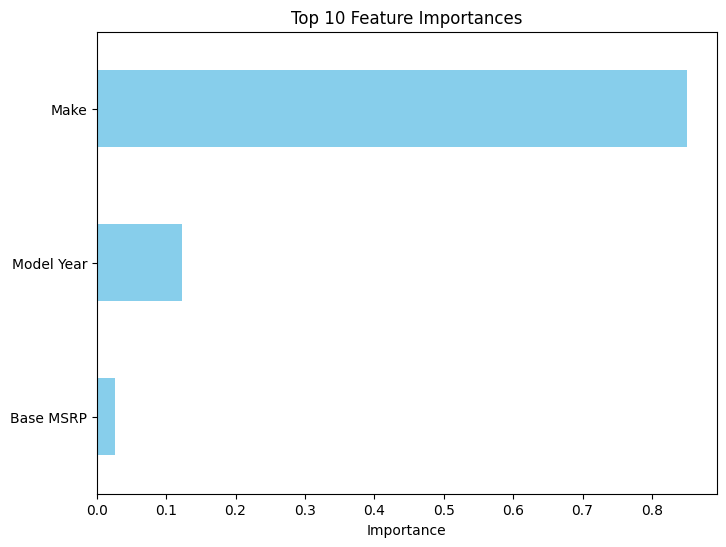

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to Pandas Series and sort
pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10).plot(kind='barh', figsize=(8,6), color='skyblue')
plt.gca().invert_yaxis()  # so the highest importance is on top
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

# Create Pickle file

In [18]:
# Save model & encoders
import pickle
with open("ev_type_model.pkl", "wb") as f:
    pickle.dump((rf, le_make, le_target), f)

print("EV Type classification model saved successfully")

EV Type classification model saved successfully


In [2]:
!streamlit run app.py

^C
